# **Examen #2 de Métodos computacionales 13-Feb-2024**

## **Instrucciones Generales:**  
- El examen consta de **3 puntos**, cada uno con el mismo valor.  
- **No está permitido** el uso de herramientas de inteligencia artificial para resolver los ejercicios.  
- Puede consultar únicamente la **documentación oficial, libros de texto, apuntes y recursos autorizados**.  
- Se valorará la **claridad, justificación de los procedimientos y el desarrollo completo** de las respuestas.  

**Tiempo total:** 2 horas

**Nota:** Cualquier indicio de uso de herramientas no permitidas será motivo de anulación del examen.  


# 1.(33%) Péndulo
 I) The period of a pendulum of length l oscillating at a large angle $\alpha$ is given by
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
where
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
is the period of the same pendulum at small amplitudes. Any numerical evaluation of the integral as is would fail (explain why). If we change the variable by writing:
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
we can get:
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
which is a well-behaved integral. Write a program to use the above integral to calculate the ratio $T/T_0$ for integral amplitudes $0^\circ \le\alpha \le 90^\circ$. Output these values as a pandas dataframe showing the amplitude in degrees and radians as well as $T/T_0$, and make a plot with the two columns. Explain the result when $\alpha = 0.$

El cambio de variable es necesario puesto que si usamos un metodo numerico con la primera integral al evaluar en el borde superior tendriamos 1/0 lo cual no esta definido y por tanto perderiamos esa información

cuando α=0 entonces tenemos la integral de dθ la cual trivialmente es en este caso π/2 y esto al ser multiplicado por su inverso 2/π nos da el 1 que observamos en la tabla (Fisicamente al ser el angulo 0 el periodo antes y despues es el mismo)


In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from scipy.integrate import quad
n=100
F=[]
for i in np.linspace(0,np.pi/2,n): #Evaluamos distintos valores para alpha
  f=lambda x:1/np.sqrt(1-(np.sin(i/2)*np.sin(x))**2) #definimos la función a integrar
  z,e=quad(f, 0, np.pi/2)
  F.append([z*2/np.pi,i,np.degrees(i)])
pd.DataFrame(F,columns=["T/T0","alpha(rad)","alpha(deg)"])

,T/T0,alpha(rad),alpha(deg)
0,1.000000,0.000000,0.000000
1,1.000016,0.015867,0.909091
2,1.000063,0.031733,1.818182
3,1.000142,0.047600,2.727273
4,1.000252,0.063467,3.636364
...,...,...,...
95,1.163806,1.507330,86.363636
96,1.167832,1.523196,87.272727
97,1.171930,1.539063,88.181818
98,1.176099,1.554930,89.090909


# 2. Calentamiento Global
El conjunto de datos a continuación ofrece una visión detallada de las anomalías de temperatura terrestre:


https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt


Las anomalías de temperatura son variaciones en la temperatura media superficial del planeta respecto a un promedio histórico. Estas variaciones pueden ser tanto positivas (más cálidas) como negativas (más frías) y constituyen indicadores esenciales del cambio climático a nivel mundial. Para obtener información adicional, consulte:


https://climate.nasa.gov/en-espanol/signos-vitales/temperatura-global/?intent=111

Este ejercicio no solo busca profundizar en la comprensión del calentamiento global, sino también distinguir entre la interpolación y la construcción de modelos. Con el código proporcionado que procesa los datos de cambio climático reportados por la National Aeronautics and Space Administration,


```python
import pandas as pd
import matplotlib.pylab as plt
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]


# Muestra las primeras filas del DataFrame
print(data.head())
```

Realice lo siguiente en un gráfico combinado:



1. Gráfico de la media móvil de 5 años (Promedio_5) frente al año, representado con líneas.
2. Gráfico de los datos sin suavizar (NoSauvizado) frente al año.


3. Analice el gráfico resultante y extraiga conclusiones.

Posteriormente, construiremos un modelo para evaluar el incremento de la temperatura en años recientes utilizando el código de regresión dado a continuación:


```python
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define la función del modelo que deseas ajustar
# En este caso, una función lineal: f(x) = m*x + b
def linear_func(x, m, b):
    return m * x + b

# Datos de ejemplo, reemplace en esta linea por los valores de interes
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x, y)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_func(x_fit, m, b)

# Graficar datos y ajuste
plt.scatter(x, y, label='Datos')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

```


 Seleccione los datos del periodo 2000-2020 y proceda a:

4. Ajustar los datos sin suavizar (NoSauvizado) vs al año de forma lineal.
5. Interpolar los datos entre los años 2000 y 2020.


6. ¿Es preferible realizar una interpolación o un ajuste de parámetros al modelo en este caso? Justifique su respuesta.

7. ¿Cómo podría predecirse el incremento en la temperatura anómala para el año 2030? Justifique su respuesta.






3) Aunque la curva suavizada es bastante fiel es claro ver que en ciertos picos en los datos puede encontrarse un error grande

6) debido a que nuestro ajuste fue solo lineal es preferible en este caso una interpolación ya que esta se adapta mejor a los datos, aun asi tal vez un ajuste de parametros con otro tipo de función podria llegar a ser mejor

7)Utilizando una extrapolación de los datos ya que con los metodos anteriores al no haber puntos de referencia se fallaria al predecir

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]


# Muestra las primeras filas del DataFrame
print(data.head())

    Año  NoSauvizado  Promedio_5
0  1880        -0.17       -0.10
1  1881        -0.09       -0.13
2  1882        -0.11       -0.17
3  1883        -0.17       -0.20
4  1884        -0.28       -0.24


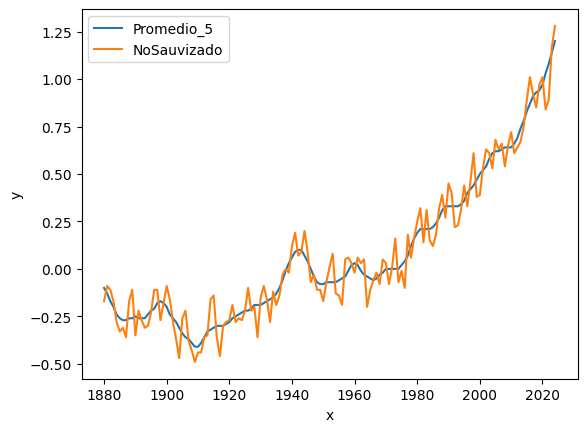

In [ ]:
fig,ax=plt.subplots()
data.plot(x="Año", y="Promedio_5",ax=ax, kind="line")
data.plot(x="Año", y="NoSauvizado", ax=ax, kind="line")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


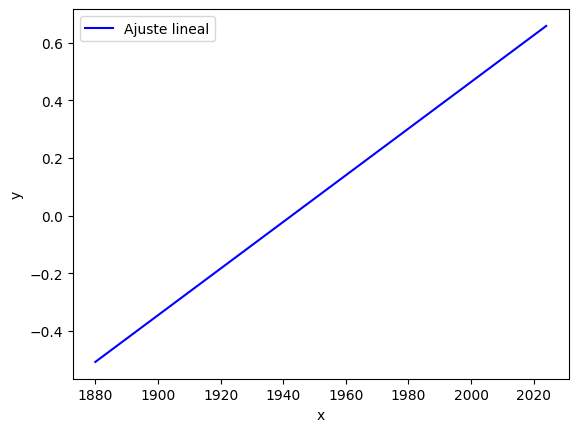

In [ ]:
from scipy.optimize import curve_fit
def linear_func(x, m, b):
    return m * x + b
x = np.array(data["Año"])
y = np.array(data["NoSauvizado"])
params, covariance = curve_fit(linear_func, x, y)
m, b = params
xn=np.linspace(min(x), max(x), 100)
yn=linear_func(xn, m, b)

plt.plot(xn, yn, label='Ajuste lineal', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

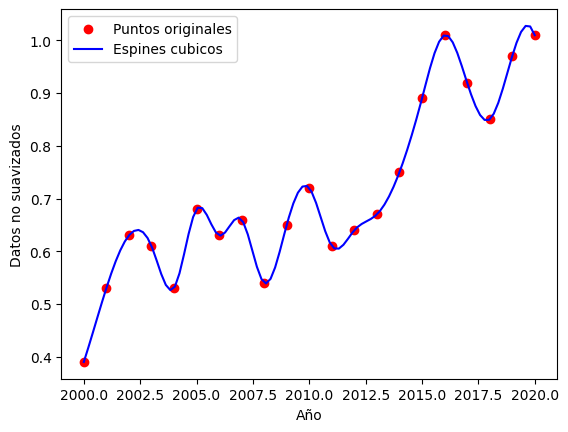

In [ ]:
from scipy.interpolate import CubicSpline

xt=np.array(data["Año"])
nst=np.array(data['NoSauvizado'])
Pr5=np.array(data['Promedio_5'])
xi=xt[120:141]
nsi=nst[120:141]
pri=Pr5[120:141]
I2=CubicSpline(xi, pri)
I1=CubicSpline(xi, nsi)

xp=np.linspace(2000,2020,100)
yi=I1(xp)
plt.scatter(xi,nsi, color='red', label="Puntos originales")
plt.plot(xp, yi, label='Espines cubicos', color='blue')
plt.xlabel('Año')
plt.ylabel('Datos no suavizados')
plt.legend()
plt.show()

# 3. Derivación numérica

En el siguiente link ([datos_pendulo](https://github.com/hernansalinas/Curso_Metodos_Computacionales/tree/main/Entregas/Parciales/Parcial2/dataset)), se encuentran  datos experimentales de un péndulo simple tomadas a través de una cámara web y procesados con el programa [kinovea](https://www.kinovea.org/). Dados los datos en formato csv,  construir un programa que realice lo siguiente:

- a. Leer el archivo csv a través de un Data Frame de Pandas, las columnas del data frame deberan ser:

col=["Tiempo[ms]", "AnguloDeg", "AnguloRad"]

- b. Construya una grafica de :
plt.plot(df['Tiempo[ms]'], df['AnguloDeg'],"b-")

¿Qué puede concluir respecto al movimiento del pendulo?

- c. Realice un gráfico de la rapidez angular como funcion del tiempo medio.$\frac{\mathrm{d}\theta}{\mathrm{d}t}$

- d. realice un grafico de la  aceleración angular como funcion del tiempo medio  $\frac{\mathrm{d^2}\theta}{\mathrm{d}t^2}$

Bonus

Calcule la transformada de fourier de los datos obtenidos, para encontrar la frecuencia de oscilacion del sistema, para ello realice lo siguiente:

- importe la librerias de scipy fft, fftfreq.
- Aplique la transformada de fourier como sigue:

```python
tf = fft(df['AnguloRad'].values)
T = 33E-3 #Paso del tiempo
N = len(df['Tiempo[ms]'])
xf = fftfreq(N, T)[:N//2]

plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0, 2)

```

-  Para las valores en el eje x y eje y de la anterior gráfica, realice una interpolación.

- Encuentre el valor máximo de frecuencia

In [ ]:
Url2="https://raw.githubusercontent.com/hernansalinas/Curso_Metodos_Computacionales/refs/heads/main/Entregas/Parciales/Parcial2/dataset/Pendulo_simple.csv"
data = pd.read_csv(Url2, sep=";",decimal=",")
data.columns = ["Tiempo[ms]", "AnguloDeg"]
data['AnguloRad']=np.deg2rad(data['AnguloDeg'])
data.head()

,Tiempo[ms],AnguloDeg,AnguloRad
0,9,59.028961,1.030250
1,42,59.982327,1.046889
2,75,61.237453,1.068795
3,108,63.004925,1.099643
4,142,65.388771,1.141249


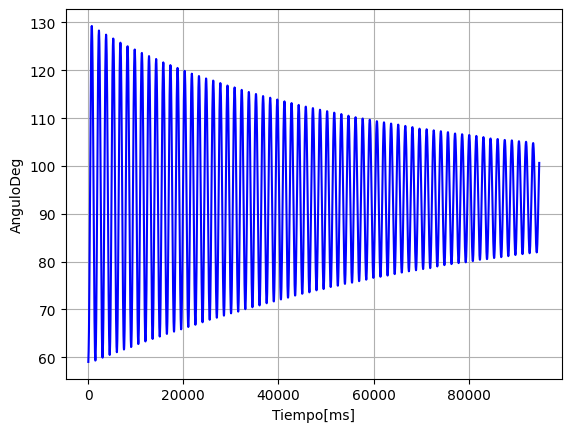

In [ ]:
from os import replace

plt.plot(data['Tiempo[ms]'], data['AnguloDeg'],"b-")
plt.grid()
plt.xlabel('Tiempo[ms]')
plt.ylabel('AnguloDeg')
plt.show()

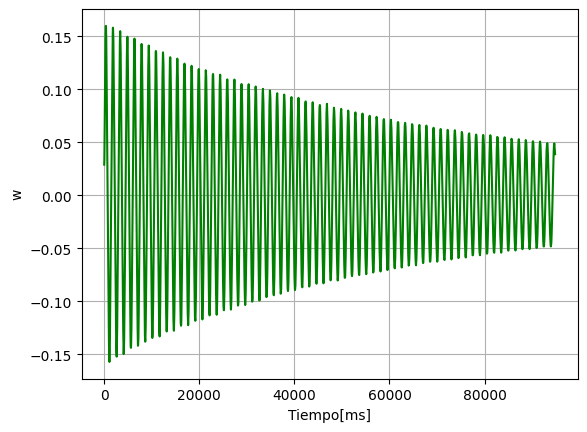

In [ ]:
w=np.gradient(data['AnguloDeg'],data['Tiempo[ms]'])
plt.plot(data['Tiempo[ms]'], w,"g-")
plt.grid()
plt.xlabel('Tiempo[ms]')
plt.ylabel('w')
plt.show()

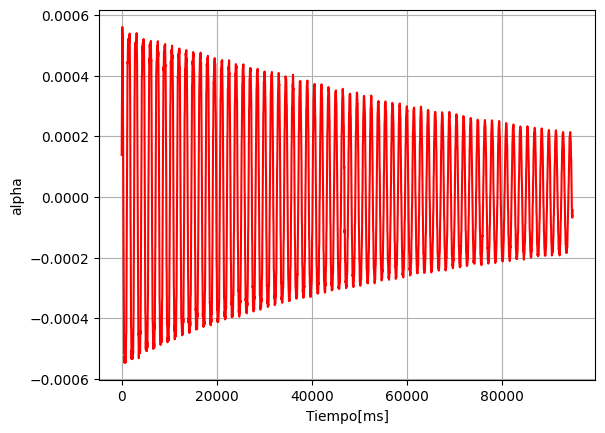

In [ ]:
alpha=np.gradient(w,data['Tiempo[ms]'])
plt.plot(data['Tiempo[ms]'], alpha,"r-")
plt.grid()
plt.xlabel('Tiempo[ms]')
plt.ylabel('alpha')
plt.show()


La maxima frecuencia es aproximadamente 0.6706706706706707


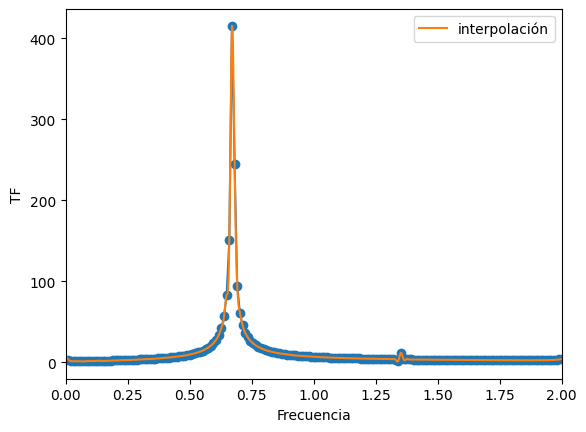

In [ ]:
from scipy.fft import fft, fftfreq

tf = fft(data['AnguloRad'].values)
T = 33E-3 #Paso del tiempo
N = len(data['Tiempo[ms]'])
xf = fftfreq(N, T)[:N//2]

plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0, 2)

ict=CubicSpline(xf[1:N//2], np.abs(tf[1:N//2]))
l=np.linspace(0,2,1000)
plt.plot(l,ict(l),label="interpolación")
plt.legend()


for i in  l:
  ict(i)
  if ict(i)==max(ict(l)):
    maxfr=i

print(f"La maxima frecuencia es aproximadamente {maxfr}")
plt.show()


Respecto al movimiento del pendulo, este sigue una trayectoria esperada debido a que como se ve en la grafica su angulo de amplitud va disminuyendo segun pasa el tiempo

Para el calculo de las derivadas se uso una función que la calcula utilizando la definición de limite